In [2]:
print("hello world")

hello world


In [4]:
print("bipin")

bipin


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: C:\Users\bipin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: C:\Users\bipin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
import tensorflow as tf

In [4]:
import matplotlib.pyplot as plt

In [5]:
import os
print("current Dir",os.getcwd())
curr_dir=os.getcwd()
train_path=os.path.join(curr_dir,"datasets","Train")
testing_path=os.path.join(curr_dir,"datasets","Test")
valid_path=os.path.join(curr_dir,"datasets","Valid")

current Dir c:\Users\bipin\Desktop\potato-disease-project


In [6]:
training_set=tf.keras.utils.image_dataset_from_directory(train_path,labels="inferred",label_mode="categorical",color_mode="rgb",image_size=(128,128),shuffle=True,interpolation="bilinear",)

Found 900 files belonging to 3 classes.


In [7]:
training_set.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [8]:
validation_set=tf.keras.utils.image_dataset_from_directory(
    valid_path,labels="inferred",label_mode="categorical",color_mode="rgb",image_size=(128,128),shuffle=True,interpolation="bilinear",)


Found 300 files belonging to 3 classes.


In [9]:
cnn1=tf.keras.models.Sequential()
cnn1.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn1.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn1.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn1.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn1.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn1.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn1.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn1.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn1.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn1.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn1.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn1.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn1.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn1.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn1.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn1.add(tf.keras.layers.Dropout(0.25))

cnn1.add(tf.keras.layers.Flatten())
cnn1.add(tf.keras.layers.Dense(units=1500,activation='relu'))
cnn1.add(tf.keras.layers.Dropout(0.4))

cnn1.add(tf.keras.layers.Dense(units=3,activation='softmax'))

C:\Users\bipin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
cnn1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
cnn1.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,790,227 (29.72 MB)

 Trainable params: 7,790,227 (29.72 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
training_history=cnn1.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 25s 730ms/step - accuracy: 0.3510 - loss: 1.5709 - val_accuracy: 0.6433 - val_loss: 0.8567
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 20s 677ms/step - accuracy: 0.6249 - loss: 0.8239 - val_accuracy: 0.4900 - val_loss: 1.0074
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 19s 673ms/step - accuracy: 0.6507 - loss: 0.7282 - val_accuracy: 0.8167 - val_loss: 0.4475
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 20s 700ms/step - accuracy: 0.8172 - loss: 0.4197 - val_accuracy: 0.8233 - val_loss: 0.3983
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 21s 726ms/step - accuracy: 0.8303 - loss: 0.3950 - val_accuracy: 0.8967 - val_loss: 0.2460
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 23s 792ms/step - accuracy: 0.9030 - loss: 0.2567 - val_accuracy: 0.9333 - val_loss: 0.1960
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 23s 774ms/step - accuracy: 0.9042 - loss: 0.2177 - val_accuracy: 0.9000 - val_loss: 0.2637
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 22s 757ms/step - accuracy: 0.9350 - loss: 0.1800 - val_accu

In [13]:
train_loss,train_acc=cnn1.evaluate(training_set)
print("Training accuracy:",train_acc)

29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 183ms/step - accuracy: 0.9794 - loss: 0.0594
Training accuracy: 0.9788888692855835


In [14]:
val_loss,val_acc=cnn1.evaluate(validation_set)
print("validation Accuracy:",val_acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 175ms/step - accuracy: 0.9396 - loss: 0.1417
validation Accuracy: 0.9399999976158142


In [15]:
cnn1.save('trained_plant_disease1_model.keras')

In [17]:
training_history.history

{'accuracy': [0.4122222363948822,
  0.6511111259460449,
  0.7044444680213928,
  0.8222222328186035,
  0.8388888835906982,
  0.9144444465637207,
  0.9144444465637207,
  0.9399999976158142,
  0.9077777862548828,
  0.9544444680213928],
 'loss': [1.2502669095993042,
  0.7450262308120728,
  0.6246606707572937,
  0.4084228575229645,
  0.3729427456855774,
  0.23644417524337769,
  0.21182094514369965,
  0.15441669523715973,
  0.23848648369312286,
  0.12059466540813446],
 'val_accuracy': [0.6433333158493042,
  0.49000000953674316,
  0.8166666626930237,
  0.8233333230018616,
  0.8966666460037231,
  0.9333333373069763,
  0.8999999761581421,
  0.7933333516120911,
  0.9399999976158142,
  0.9399999976158142],
 'val_loss': [0.8567120432853699,
  1.0073657035827637,
  0.44746413826942444,
  0.39828604459762573,
  0.24597503244876862,
  0.19604463875293732,
  0.2637343406677246,
  0.5713962912559509,
  0.14615792036056519,
  0.1586254984140396]}

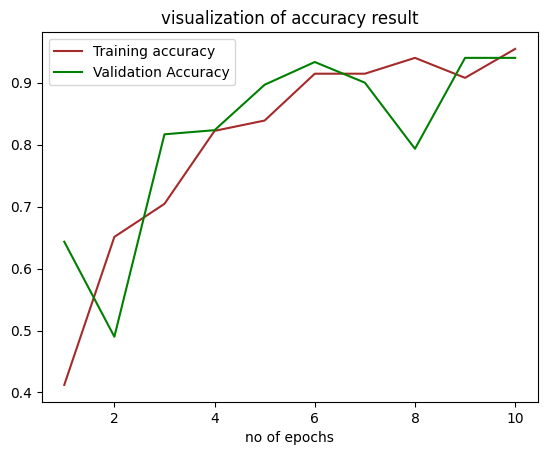

In [21]:
epochs=[i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='brown',label='Training accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='green',label="Validation Accuracy")
plt.xlabel("no of epochs")
plt.title("visualization of accuracy result")
plt.legend()
plt.show()